In [1]:
import pickle
import torch
from torch import nn
import matplotlib.pyplot as plt
from constants import *
import numpy as np
import cv2
from copy import deepcopy
import torchvision

In [2]:
data0 = pickle.load(open("./val_range_rl_data/positive/data0.pkl", "rb"))
data1 = pickle.load(open("./val_range_rl_data/positive/data1.pkl", "rb"))
data2 = pickle.load(open("./val_range_rl_data/positive/data2.pkl", "rb"))
data3 = pickle.load(open("./val_range_rl_data/positive/data3.pkl", "rb"))
data4 = pickle.load(open("./val_range_rl_data/positive/data4.pkl", "rb"))
data5 = pickle.load(open("./val_range_rl_data/positive/data5.pkl", "rb"))
data6 = pickle.load(open("./val_range_rl_data/positive/data6.pkl", "rb"))
data7 = pickle.load(open("./val_range_rl_data/positive/data7.pkl", "rb"))
data8 = pickle.load(open("./val_range_rl_data/positive/data8.pkl", "rb"))
data9 = pickle.load(open("./val_range_rl_data/positive/data9.pkl", "rb"))

In [42]:
data12 = pickle.load(open("./val_range_data/data2.pkl", "rb"))

In [3]:
mouse_labels = pickle.load(open("./mouse_labels.pkl", "rb"))

In [4]:
len(mouse_labels)

906

In [24]:
data0[0][2][0]

In [16]:
data0[0][2][len(data0[0][0])-10][0].lLastX


3

In [45]:
len(data12[0])

776

In [43]:
plt.imshow(data12[0][1200])

IndexError: list index out of range

In [46]:
data12[4][30][0].shape

(128, 94)

In [26]:
94/2

47.0

In [47]:
frames = []
mouses = []
keyboards = []
rewards = []
spectrograms = []

rewarder = 1.0

for i in range(len(data12[0])):
    frames.append(cv2.resize(np.array(data12[0][i], dtype=np.float32), (280, 150))/255.0)
    
    mouse_data = data12[2][i]

    mouse_dx = 0
    mouse_dy = 0

    leftclick = 0
    space = 0
    w = 0
    a = 0
    s = 0
    d = 0
    shift = 0
    ctrl = 0

    #print(mouse_data)

    for entry in mouse_data:
        mouse_dx += entry.lLastX
        mouse_dy += entry.lLastY
        
        if entry.union.structure.usButtonFlags == 1 and leftclick == 0:
            leftclick = 1
        elif entry.union.structure.usButtonFlags == 2 and leftclick == 0:
            leftclick = -1

    if mouse_dx == 0 and mouse_dy == 0:
        continue

    mag = (mouse_dx**2 + mouse_dy**2)**0.5
    if mag != 0:
        mouse_dx /= mag
        mouse_dy /= mag
    
    
    mouses.append([leftclick, mag, mouse_dx, mouse_dy])
    spectrograms.append((cv2.resize(data12[4][i][0], (64, 47)), cv2.resize(data12[4][i][1], (64, 47))))
    




In [46]:
len(frame_trajectories)

906

In [5]:
frames = []
mouses = []
for i in range(len(mouse_labels)):
    if mouse_labels[i] != 0:
        frames.append(frame_trajectories[i])
        mouses.append(mouse_trajectories[i])
    
    elif mouse_trajectories[i][0] != 0:
        frames.append(frame_trajectories[i])
        mouses.append(mouse_trajectories[i])
    else:
        # roll a dice
        if np.random.rand() < 0.2:
            frames.append(frame_trajectories[i])
            mouses.append([0.0, 0.0, 0.0, 0.0])
    

In [36]:
len(mouses)

1438

In [48]:
mouses

[[1, 2208.00928440077, 0.9981842085406547, 0.0602352539636602],
 [-1, 31.400636936215164, 0.6050832675335579, -0.7961621941231025],
 [0, 268.7824399026097, 0.22322886875251344, -0.9747660602193088],
 [0, 438.3617227815403, 0.18249768591193438, -0.9832062828505466],
 [0, 144.83784035948617, -0.3245008340592931, -0.9458854099175138],
 [0, 20.248456731316587, -0.9383431168171101, -0.34570535882735637],
 [0, 18.439088914585774, 0.21693045781865616, -0.9761870601839528],
 [0, 80.30566605165541, -0.996193717496113, 0.08716695028090989],
 [0, 1676.2293995751297, -0.998073414309552, 0.062044013800474244],
 [0, 1903.4203424362156, -0.999779164682207, 0.02101480114938953],
 [0, 352.8526604689272, -0.9834133021382091, -0.18137882229638438],
 [0, 76.11832893594026, 0.9853080203996409, 0.17078672353593777],
 [0, 3.1622776601683795, 0.9486832980505138, 0.31622776601683794],
 [0, 1291.0654514779644, 0.998400196151481, 0.05654244710555323],
 [0, 3837.088088642219, 0.9999770428407729, 0.006775971622064

In [49]:
mouses = np.array(mouses)

In [34]:
mouses

array([[ 0., nan,  0.,  0.],
       [ 0., nan,  0.,  0.],
       [ 0., nan,  0.,  0.],
       ...,
       [ 0., nan,  0.,  0.],
       [ 0., nan,  0.,  0.],
       [ 0., nan,  0.,  0.]])

In [50]:
max_mag = np.max(mouses[:, 1])
print(max_mag)
mouses[:, 1] = mouses[:, 1] / max_mag

3837.088088642219


In [ ]:
len()

In [53]:
len(spectrograms)

673

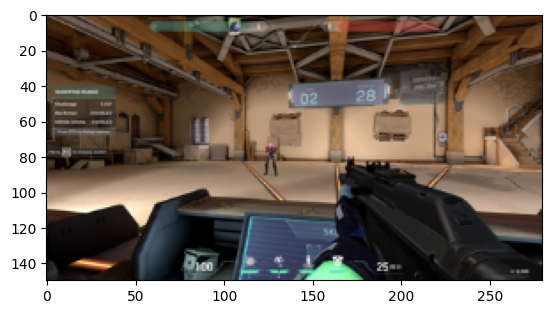

In [9]:
plt.imshow(frames[46])

In [4]:
frame_trajectories = frame_trajectories[100:]

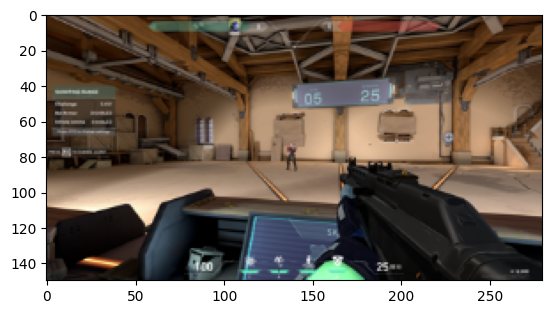

In [11]:
class Value(nn.Module):
    def __init__(self):
        super().__init__()
        self.convs = nn.Sequential(
            nn.Conv2d(1, 64, 3, padding=1),
            nn.LeakyReLU(),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.LeakyReLU(),
            nn.MaxPool2d(2),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.LeakyReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(128, 128, 3, padding=1),
            nn.LeakyReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(128, 128, 3, padding=1),
            nn.LeakyReLU(),
            nn.MaxPool2d(2),
        )

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(2304, 256),
            nn.Tanh(),
            nn.Linear(256, 256),
            nn.Tanh(),
            nn.Linear(256, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
        )

        self.fc2 = nn.Sequential(
            nn.Linear(64, 15),
            nn.Tanh(),
            nn.Linear(15, 1)
        )


    def forward(self, input):
        x = self.convs(input)

        #print(x.shape, cursor_position.shape)
        x = self.fc(x)
        x = self.fc2(x)
        return x

In [7]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # self.convs = nn.Sequential(
        #     nn.Conv2d(1, 64, 3, padding=1),
        #     nn.LeakyReLU(),
        #     nn.Conv2d(64, 64, 3, padding=1),
        #     nn.LeakyReLU(.1),
        #     nn.MaxPool2d(2),
        #     nn.Conv2d(64, 128, 3, padding=1),
        #     nn.LeakyReLU(.1),
        #     nn.MaxPool2d(2),
        #     nn.Conv2d(128, 128, 3, padding=1),
        #     nn.LeakyReLU(.1),
        #     nn.MaxPool2d(2),
        #     nn.Conv2d(128, 128, 3, padding=1),
        #     nn.LeakyReLU(.1),
        #     nn.MaxPool2d(2),
        #     nn.Conv2d(128, 128, 3, padding=1),
        #     nn.LeakyReLU(.1),
        #     nn.MaxPool2d(2),
        # )

        self.convs = nn.Sequential(
            nn.Conv2d(1, 128, 3, padding=1),
            nn.PReLU(),
            nn.Conv2d(128, 128, 3, padding=1),
            nn.MaxPool2d(2),
            nn.Conv2d(128, 128, 3, padding=1),
            nn.PReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(128, 128, 3, padding=1),
            nn.PReLU(),
            nn.MaxPool2d(2),
            # nn.Conv2d(128, 128, 3, padding=1),
            # nn.PReLU(),
            # nn.MaxPool2d(2),
            # nn.Conv2d(128, 256, 3, padding=1),
            # nn.PReLU(),
            # nn.MaxPool2d(2),
            # nn.Conv2d(256, 256, 3, padding=1),
            # nn.PReLU(),
            # nn.MaxPool2d(2),
            # nn.Conv2d(256, 256, 3, padding=1),
            # nn.PReLU(),
            # nn.MaxPool2d(2),
        )

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(768, 256),
            nn.PReLU(),
            nn.Linear(256, 256),
            nn.PReLU(),
            nn.Linear(256, 128),
            nn.PReLU(),
            nn.Linear(128, 64),
        )

        self.fc2 = nn.Sequential(
            nn.Linear(64, 15),
            nn.Linear(15, 2),
            nn.Tanh(),
        )
        
    def forward(self, input):
        x = self.convs(input)

        #print(x.shape, cursor_position.shape)
        x = self.fc(x)
        x = self.fc2(x)
        #print(means)
        #stds = torch.clamp(self.logstds.exp(), 1e-3, 5)

        return x

In [11]:
efficientnet = torchvision.models.efficientnet_b0(pretrained=True)

d:\PythonLang\Py3-11-2\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\PythonLang\Py3-11-2\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [12]:
new_model = efficientnet.features[:6]

In [13]:
new_model.requires_grad_(True)

Sequential(
  (0): Conv2dNormActivation(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): SiLU(inplace=True)
  )
  (1): Sequential(
    (0): MBConv(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): SiLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
          (activation): SiLU(inplace=True)
          (scale_activation): Sigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), 

In [9]:
output.shape

NameError: name 'output' is not defined

In [14]:
class Net(nn.Module):
    def __init__(self, eff):
        super().__init__()
        # self.convs = nn.Sequential(
        #     nn.Conv2d(1, 64, 3, padding=1),
        #     nn.LeakyReLU(),
        #     nn.Conv2d(64, 64, 3, padding=1),
        #     nn.LeakyReLU(.1),
        #     nn.MaxPool2d(2),
        #     nn.Conv2d(64, 128, 3, padding=1),
        #     nn.LeakyReLU(.1),
        #     nn.MaxPool2d(2),
        #     nn.Conv2d(128, 128, 3, padding=1),
        #     nn.LeakyReLU(.1),
        #     nn.MaxPool2d(2),
        #     nn.Conv2d(128, 128, 3, padding=1),
        #     nn.LeakyReLU(.1),
        #     nn.MaxPool2d(2),
        #     nn.Conv2d(128, 128, 3, padding=1),
        #     nn.LeakyReLU(.1),
        #     nn.MaxPool2d(2),
        # )

        self.efficientnet = eff



        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(20160, 128),
            nn.PReLU(),
            nn.Linear(128, 128),
            nn.PReLU(),
            nn.Linear(128, 128),
            nn.PReLU(),
            nn.Linear(128, 64),
        )

        self.fc2 = nn.Sequential(
            nn.Linear(64, 16),
            nn.Linear(16, 4),
            
        )
        
    def forward(self, input):
        x = self.efficientnet(input)

        #print(x.shape, cursor_position.shape)
        x = self.fc(x)
        x = self.fc2(x)
        #print(means)
        #stds = torch.clamp(self.logstds.exp(), 1e-3, 5)

        return x

In [15]:
net = Net(new_model)
#value_net = Value()
# optimizer



In [16]:
optimizer = torch.optim.Adam(net.parameters(), lr=5e-4)
#value_optimizer = torch.optim.Adam(value_net.parameters(), lr=0.0001)
# loss function
# loss_func = nn.CrossEntropyLoss()
loss_func = nn.MSELoss()

In [12]:
len(trajectories)

1

In [41]:
mouse_labels = []
for i in range(len(mouse_trajectories)):
    if mouse_trajectories[i][0] > .65:
        mouse_labels.append(1)
    elif mouse_trajectories[i][0] < -.65:
        mouse_labels.append(2)
    else:
        mouse_labels.append(0)

In [ ]:
# discretize mouse data
# for i in range(len(mouse_trajectories)):
#     mouse_trajectories[i][0] = int(mouse_trajectories[i][0] * 5 + 5)
#     mouse_trajectories[i][1] = int(mouse_trajectories[i][1] * 5 + 5)



In [49]:
len(trajectories[5])

55

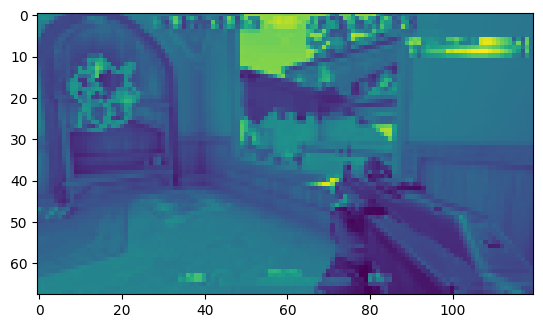

In [44]:
plt.imshow(trajectories[1][45][0])

AttributeError: 'list' object has no attribute 'shape'

In [28]:
mouse_trajectories = torch.tensor(mouse_trajectories, dtype=torch.float32)

In [13]:
frame_trajectories = torch.tensor(frame_trajectories, dtype=torch.float32)

C:\temp\ipykernel_12976\1354784659.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:248.)
  frame_trajectories = torch.tensor(frame_trajectories, dtype=torch.float32)


In [46]:
mouse_labels = torch.tensor(mouse_labels, dtype=torch.float32)

In [17]:
frames = torch.tensor(frames, dtype=torch.float32)

C:\temp\ipykernel_8416\3481956246.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:248.)
  frames = torch.tensor(frames, dtype=torch.float32)


In [18]:
mouses=torch.tensor(mouses, dtype=torch.float32)

In [18]:
frame_trajectories = frame_trajectories.to("cuda")

In [19]:
mouse_trajectories = mouse_trajectories.to("cuda")

In [54]:
trajectories[0][0]

(array([[0.5058824 , 0.5058824 , 0.5058824 , ..., 0.3245098 , 0.41078433,
         0.5421569 ],
        [0.5058824 , 0.5058824 , 0.5058824 , ..., 0.30686277, 0.29901963,
         0.42941177],
        [0.504902  , 0.5058824 , 0.5058824 , ..., 0.36960787, 0.3156863 ,
         0.28725493],
        ...,
        [0.30588236, 0.3019608 , 0.3362745 , ..., 0.17745098, 0.1754902 ,
         0.16764706],
        [0.3       , 0.29215688, 0.33235294, ..., 0.1754902 , 0.1764706 ,
         0.17745098],
        [0.3       , 0.2882353 , 0.327451  , ..., 0.19411765, 0.17843138,
         0.17450981]], dtype=float32),
 [-0.9363291775690445, 0.3511234415883917, 0, 0, 0, 0, 0, 0],
 0.4585287622781637)

In [19]:
losses = []

In [131]:
mouse_trajectories[90]

tensor([0., 0.])

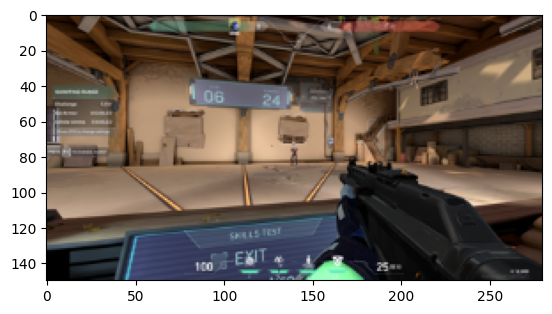

In [130]:
plt.imshow(frame_trajectories[90].cpu().detach().numpy())

In [76]:
for i in range(len(trajectories)):
    trajectories[i] = np.array(trajectories[i])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (111, 3) + inhomogeneous part.

In [20]:
net = net.to("cuda")

In [37]:
losses = []

In [56]:
frame_trajectories = torch.tensor(frame_trajectories, dtype=torch.float32)

ValueError: expected sequence of length 228 at dim 1 (got 41)

In [21]:
accuracy = []

In [17]:
mouses.shape

torch.Size([168])

In [16]:
frames.shape

torch.Size([168, 150, 280, 3])

In [22]:

for epoch in range(1000):
    b = 16
    size = len(frames)//b
    # shuffle
    #frames = frames[torch.randperm(len(frames))]
    for step_index in range(size):
        index = step_index
        f = frames[index*b:index*b+b]
        action = mouses[index*b:index*b+b]
        #action = mouse_trajectories[index*b:index*b+b]
        # rewards = torch.tensor(reward_trajectories[traj_index][step_index*b:step_index*b+b]).to("cuda")

        f = f.to("cuda")
        action = action.to("cuda")    

        #print(frames.shape)
        loss = loss_func(net(f.permute(0, 3, 1, 2)), action)
        
        #nn.utils.clip_grad_norm_([p for g in optimizer.param_groups for p in g["params"]], 1.0)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        losses.append(loss.item())
        # for name, param in net.named_parameters():
        #     if param.grad is not None:
        #         print(f'Layer: {name}, Mean Gradient: {param.grad.mean().item()}')

        # # average loss of past 100
        if len(losses) > 100:
            losses.pop(0)
        avg_loss = sum(losses) / len(losses)

        # computeaccuracy
        # if len(accuracy) > 3:
        #     accuracy.pop(0)
        # if len(accuracy) > 0:
        #     accs = sum(accuracy) / len(accuracy)
        # else:
        #     accs = 0

        #print(epoch, i, l.item()*100, end="\r")
        print(epoch, index, loss.item(), avg_loss, end="\r")

    # with torch.no_grad():
    #     acc = 0
    #     for i in range(len(mouses)):
    #         if torch.argmax(net(frames[i].unsqueeze(0).permute(0, 3, 1, 2).to("cuda"))) == mouse_labels[i]:
    #             acc += 1
    #     acc /= len(mouses)
    #     accuracy.append(acc)
        #print("Accuracy: ", acc)


KeyboardInterrupt: 

In [18]:
with torch.no_grad():
    acc = 0
    for i in range(len(mouses)):
        if torch.argmax(net(frames[i].unsqueeze(0).permute(0, 3, 1, 2).to("cuda"))) == mouses[i]:
            acc += 1
    acc /= len(mouses)
    #accuracy.append(acc)
    print("Accuracy: ", acc)

Accuracy:  0.9801980198019802


In [59]:
other_poops = []
for i in range(len(mouse_labels)):
    if mouse_labels[i] != 0:
        other_poops.append(i)

In [82]:
len(other_poops)

134

In [19]:
i = other_poops[37]
print(i)
print(mouse_labels[i])
plt.imshow(frame_trajectories[i].cpu().detach().numpy())

NameError: name 'other_poops' is not defined

In [41]:
i = 201

tensor([[-0.0295, -0.4735,  0.0332]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
tensor([ 0.0407, -0.9991, -0.0434])


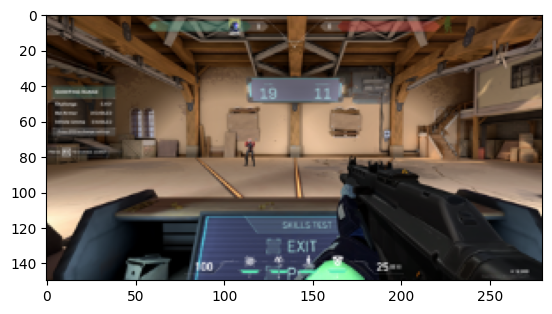

In [42]:
# test model on one sample
f = frames[i].permute(2, 0, 1).unsqueeze(0).to("cuda")
print(net(f))
print(mouses[i])
plt.imshow(f.cpu().detach().numpy()[0].transpose(1, 2, 0))

In [15]:
losses = []

In [16]:
actor_losses = []

In [17]:
# reinforcment learning

for epoch in range(100):
    for traj_index in range(len(keyboard_trajectories)):
        for step_index in range(len(keyboard_trajectories[traj_index])-1):
            frames = torch.tensor(frame_trajectories[traj_index][step_index])
            next_states = torch.tensor(frame_trajectories[traj_index][step_index+1])
            action = torch.tensor(np.array(mouse_trajectories[traj_index][step_index]))
            rewards = reward_trajectories[traj_index][step_index]


            gammas = rewards + .993 * value_net(next_states.unsqueeze(0).unsqueeze(0))

            advantages = gammas - value_net(frames.unsqueeze(0).unsqueeze(0))
            value_loss = advantages.pow(2).sum()

            norm_dists = net(frames.unsqueeze(0).unsqueeze(0))
            
            logs_probs = norm_dists.log_prob(action)

            # normalize advantages
            #advantages = (advantages - advantages.mean()) / (advantages.std() + 1e-8)
            #print(advantages)
            actor_loss = (-logs_probs*advantages.detach()).mean()
            
            optimizer.zero_grad()
            actor_loss.backward()
            nn.utils.clip_grad_norm_([p for g in optimizer.param_groups for p in g["params"]], .5)
            optimizer.step()
            
            value_optimizer.zero_grad()
            value_loss.backward()
            nn.utils.clip_grad_norm_([p for g in value_optimizer.param_groups for p in g["params"]], .5) # gradient clipping
            value_optimizer.step()


            losses.append(value_loss.item())

            # # average loss of past 100
            if len(losses) > 100:
                losses.pop(0)
            avg_loss = sum(losses) / len(losses)

            actor_losses.append(actor_loss.item())
            if len(actor_losses) > 100:
                actor_losses.pop(0)
            actor_avg_loss = sum(actor_losses) / len(actor_losses)

            print(epoch, traj_index, step_index, actor_loss.item(), actor_avg_loss, value_loss.item(), avg_loss, end="\r")


KeyboardInterrupt: 

In [23]:
torch.save(net.state_dict(), "./valorant_models/mouse_model_cont_3.pt")